# Statistical Analysis of Customer Purchase Data

This notebook contains the Python code for performing several non-parametric statistical tests on the provided customer dataset. Since the data is not normally distributed, we will use the following tests:

1.  **Chi-Square Test of Independence**: To check for an association between `Loyalty Member` and `Order Status`.
2.  **Mann-Whitney U Test**: To compare the `Total Price` between `Genders`.
3.  **Spearman Correlation Matrix**: To assess the monotonic relationships between all numerical variables.


## 1. Setup and Data Preparation

First, let's import the necessary libraries and create a sample DataFrame that mirrors the structure of the dataset.


In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# In a real scenario, you would load from a file like this:
df = pd.read_csv("labeled_customer_data.csv")

print("Dataset Preview:")
df.head()

Dataset Preview:


,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,...,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Age_Group,Spending_Category,Item_Price_Category,Addons_Spending_Category,Purchase Month
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,...,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,45-59 (Pre Senior),High Spender ($5k-$10k),Premium Item ($500-$1k),Low Add-ons Spender (0-$50),March
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,...,3,2024-04-20,Overnight,Impulse Item,26.09,45-59 (Pre Senior),Medium Spender (100-$5k),Standard Item ($100-$500),Low Add-ons Spender (0-$50),April
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,...,4,2023-10-17,Express,No Add-ons Purchased,0.00,31-44 (Middle Age),Medium Spender (100-$5k),Standard Item ($100-$500),Low Add-ons Spender (0-$50),October
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,...,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,31-44 (Middle Age),Medium Spender (100-$5k),Premium Item ($500-$1k),Medium Add-ons Spender ($51-$100),August
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,...,2,2024-05-21,Express,Accessory,35.56,60+ (Senior),Low Spender (0-$500),Budget Item (0-$100),Low Add-ons Spender (0-$50),May


---


## 2. Chi-Square Test of Independence

We want to test if there is a statistically significant association between being a `Loyalty Member` and the `Order Status`


### Hypotheses to be Tested

- **Null Hypothesis ($H_0$)**: There is no association between a customer's loyalty status and their order status. The two variables are independent.
- **Alternative Hypothesis ($H_1$)**: There is an association between a customer's loyalty status and their order status. The two variables are not independent.


In [8]:
# Create a contingency table (crosstab)
contingency_table = pd.crosstab(df["Loyalty Member"], df["Order Status"])

print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

# Interpret the result
alpha = 0.05
print("\n--- Interpretation ---")
if p_value < alpha:
    print(
        f"Since the p-value ({p_value:.4f}) is less than {alpha}, we reject the null hypothesis."
    )
    print(
        "There is a statistically significant association between loyalty status and order status."
    )
else:
    print(
        f"Since the p-value ({p_value:.4f}) is greater than {alpha}, we fail to reject the null hypothesis."
    )
    print(
        "There is no statistically significant association between loyalty status and order status."
    )

Contingency Table:
Order Status    Cancelled  Completed
Loyalty Member                      
No                   5145      10512
Yes                  1423       2920

Chi-Square Statistic: 0.0100
P-value: 0.9203
Degrees of Freedom: 1

--- Interpretation ---
Since the p-value (0.9203) is greater than 0.05, we fail to reject the null hypothesis.
There is no statistically significant association between loyalty status and order status.


`Purchase Month` and the `Spending Category`

### Hypotheses to be Tested

- **Null Hypothesis ($H_0$)**: There is no association between months (season) and customer spending category. The two variables are independent.
- **Alternative Hypothesis ($H_1$)**: There is an association between months (season) and customer spending category. The two variables are not independent.


In [17]:
# Create a contingency table (crosstab)
contingency_table1 = pd.crosstab(df["Purchase Month"], df["Spending_Category"])

print("Contingency Table:")
print(contingency_table1)

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table1)

print(f"\nChi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

# Interpret the result
alpha = 0.05
print("\n--- Interpretation ---")
if p_value < alpha:
    print(
        f"Since the p-value ({p_value:.4f}) is less than {alpha}, we reject the null hypothesis."
    )
    print(
        "There is a statistically significant association between months (season) and customer spending category."
    )
else:
    print(
        f"Since the p-value ({p_value:.4f}) is greater than {alpha}, we fail to reject the null hypothesis."
    )
    print(
        "There is no statistically significant association between months (season) and customer spending category."
    )

    # --- Cramer's V calculation ---
n = contingency_table1.sum().sum()  # total observations
min_dim = min(contingency_table1.shape) - 1  # smaller dimension - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramer's V: {cramers_v:.4f}")
# Interpret strength of association with Cramer's V
if cramers_v < 0.1:
    strength = "weak"
elif cramers_v < 0.3:
    strength = "moderate"
else:
    strength = "strong"

print(f"The strength of association is {strength} (Cramer's V = {cramers_v:.4f}).")

Contingency Table:
Spending_Category  High Spender ($5k-$10k)  Low Spender (0-$500)  \
Purchase Month                                                     
April                                  399                   254   
August                                 433                   257   
December                               130                   214   
February                               336                   251   
January                                399                   271   
July                                   429                   244   
June                                   423                   254   
March                                  388                   271   
May                                    418                   269   
November                               141                   216   
October                                166                   265   
September                              374                   247   

Spending_Category  Luxury Sp

---


## 3. Mann-Whitney U Test

Here, we will test if there is a significant difference in the `Total Price` of purchases between male and female customers.


### Hypotheses to be Tested

- **Null Hypothesis ($H_0$)**: The distribution of `Total Price` is the same for both male and female customers.
- **Alternative Hypothesis ($H_1$)**: The distribution of `Total Price` is different for male and female customers.


In [10]:
# Separate the data into two groups based on Gender
male_prices = df[df["Gender"] == "Male"]["Total Price"]
female_prices = df[df["Gender"] == "Female"]["Total Price"]

# Perform the Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(
    male_prices, female_prices, alternative="two-sided"
)

print(f"Mann-Whitney U Statistic: {u_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
print("\n--- Interpretation ---")
if p_value < alpha:
    print(
        f"Since the p-value ({p_value:.4f}) is less than {alpha}, we reject the null hypothesis."
    )
    print(
        "There is a statistically significant difference in the total purchase price between genders."
    )
else:
    print(
        f"Since the p-value ({p_value:.4f}) is greater than {alpha}, we fail to reject the null hypothesis."
    )
    print(
        "There is no statistically significant difference in the total purchase price between genders."
    )

Mann-Whitney U Statistic: 49733371.5000
P-value: 0.5351

--- Interpretation ---
Since the p-value (0.5351) is greater than 0.05, we fail to reject the null hypothesis.
There is no statistically significant difference in the total purchase price between genders.


---


## 4. Spearman Correlation Matrix

Finally, we will compute the Spearman correlation matrix to understand the monotonic relationships between all numerical and ordinal variables in the dataset. This is an exploratory analysis to identify which variables tend to move together.


### Goal of the Analysis

The goal is to calculate the Spearman correlation coefficient ($\\rho$) for each pair of numerical/ordinal variables. The coefficient measures the strength and direction of a monotonic relationship.

- A value near **+1** indicates a strong positive monotonic relationship.
- A value near **-1** indicates a strong negative monotonic relationship.
- A value near **0** indicates a weak or no monotonic relationship.


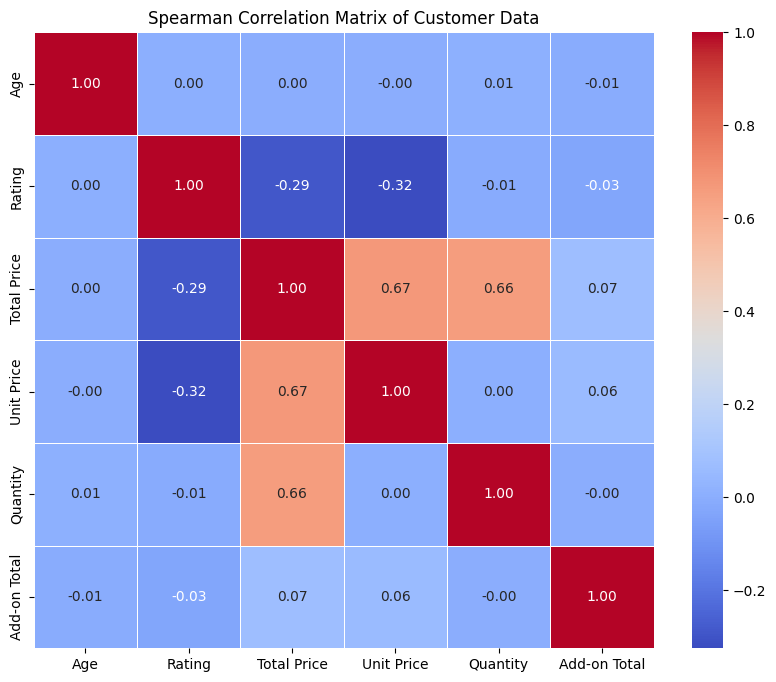


Correlation Matrix Table:


,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
Age,1.000000,0.003297,0.000794,-0.001693,0.008530,-0.006354
Rating,0.003297,1.000000,-0.290200,-0.324208,-0.008819,-0.034000
Total Price,0.000794,-0.290200,1.000000,0.672498,0.658001,0.071672
Unit Price,-0.001693,-0.324208,0.672498,1.000000,0.003045,0.055251
Quantity,0.008530,-0.008819,0.658001,0.003045,1.000000,-0.001515
Add-on Total,-0.006354,-0.034000,0.071672,0.055251,-0.001515,1.000000


In [11]:
# Select only the numerical and ordinal columns for the correlation matrix
numerical_cols = [
    "Age",
    "Rating",
    "Total Price",
    "Unit Price",
    "Quantity",
    "Add-on Total",
]
df_numerical = df[numerical_cols]

# Calculate the Spearman correlation matrix
corr_matrix = df_numerical.corr(method="spearman")

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Matrix of Customer Data")
plt.show()

print("\nCorrelation Matrix Table:")
corr_matrix